In [30]:
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings

warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/Plant_2_Generation_Data.csv
data/Plant_1_Generation_Data.csv
data/Plant_2_Weather_Sensor_Data.csv
data/Plant_1_Weather_Sensor_Data.csv


In [31]:
generation_data = pd.read_csv('data/Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('data/Plant_1_Weather_Sensor_Data.csv')
generation_data.info()
g1_df = generation_data
w1_df = weather_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [32]:
generation_data['DATE'] = pd.to_datetime(generation_data['DATE_TIME']).dt.date
generation_data['TIME'] = pd.to_datetime(generation_data['DATE_TIME']).dt.time
weather_data['DATE'] = pd.to_datetime(weather_data['DATE_TIME']).dt.date
weather_data['TIME'] = pd.to_datetime(weather_data['DATE_TIME']).dt.time

In [33]:
generation_data.head()
weather_data.head()
del generation_data['DATE_TIME']
del weather_data['DATE_TIME']

generation_data['DATE_TIME'] = generation_data["DATE"].astype(str) + " " + generation_data["TIME"].astype(str)
weather_data['DATE_TIME'] = weather_data["DATE"].astype(str) + " " + weather_data["TIME"].astype(str)
generation_data['DATE_TIME']

0        2020-05-15 00:00:00
1        2020-05-15 00:00:00
2        2020-05-15 00:00:00
3        2020-05-15 00:00:00
4        2020-05-15 00:00:00
                ...         
68773    2020-06-17 23:45:00
68774    2020-06-17 23:45:00
68775    2020-06-17 23:45:00
68776    2020-06-17 23:45:00
68777    2020-06-17 23:45:00
Name: DATE_TIME, Length: 68778, dtype: object

In [34]:
gd1=generation_data
del gd1['DATE']
del gd1['TIME']
gd1

gd1['DATE_TIME'] =  pd.to_datetime(gd1['DATE_TIME'], format='%Y-%m-%d')
gd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PLANT_ID     68778 non-null  int64         
 1   SOURCE_KEY   68778 non-null  object        
 2   DC_POWER     68778 non-null  float64       
 3   AC_POWER     68778 non-null  float64       
 4   DAILY_YIELD  68778 non-null  float64       
 5   TOTAL_YIELD  68778 non-null  float64       
 6   DATE_TIME    68778 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [35]:
wd1=weather_data
del wd1['DATE']
del wd1['TIME']
wd1
wd1['DATE_TIME'] =  pd.to_datetime(wd1['DATE_TIME'], format='%Y-%m-%d')
wd1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   PLANT_ID             3182 non-null   int64         
 1   SOURCE_KEY           3182 non-null   object        
 2   AMBIENT_TEMPERATURE  3182 non-null   float64       
 3   MODULE_TEMPERATURE   3182 non-null   float64       
 4   IRRADIATION          3182 non-null   float64       
 5   DATE_TIME            3182 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


Merging generation data and weather sensor data

In [36]:
df_solar = pd.merge(gd1.drop(columns = ['PLANT_ID']), wd1.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5)

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
18713,1IF53ai7Xc0U56Y,613.142857,59.371429,8253.000000,6257460.000,2020-05-24 18:00:00,30.759141,30.545616,0.045608
30089,YxYtjZvoooNbGkE,10930.285710,1066.928571,4159.428571,7296662.429,2020-05-30 13:30:00,29.138918,53.387913,0.805624
3682,pkci93gMrogZuBj,0.000000,0.000000,6173.000000,7181650.000,2020-05-16 21:30:00,25.286442,22.648997,0.000000
13890,1BY6WEcLGh8j5v7,2477.125000,242.912500,653.125000,6306242.125,2020-05-22 08:30:00,25.149242,32.836581,0.188462
7042,ZnxXDlPa8U1GXgE,6230.142857,610.371429,1458.857143,6544196.857,2020-05-18 11:45:00,25.215167,37.611216,0.414883


In [37]:
# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.week


# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(2)

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [38]:
df_solar.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45680 entries, 0 to 45679
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SOURCE_KEY           45680 non-null  object        
 1   DC_POWER             45680 non-null  float64       
 2   AC_POWER             45680 non-null  float64       
 3   DAILY_YIELD          45680 non-null  float64       
 4   TOTAL_YIELD          45680 non-null  float64       
 5   DATE_TIME            45680 non-null  datetime64[ns]
 6   AMBIENT_TEMPERATURE  45680 non-null  float64       
 7   MODULE_TEMPERATURE   45680 non-null  float64       
 8   IRRADIATION          45680 non-null  float64       
 9   DATE                 45680 non-null  object        
 10  TIME                 45680 non-null  object        
 11  DAY                  45680 non-null  int64         
 12  MONTH                45680 non-null  int64         
 13  WEEK                 45680 non-

finding null values

In [39]:
df_solar.isnull().sum()


SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
DATE_TIME              0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

There is no Missing Values in the dataset

In [40]:
df_solar.describe()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS
count,45680.000000,45680.000000,45680.000000,4.568000e+04,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000
mean,3197.175971,312.652679,3313.146538,6.957007e+06,25.917168,31.877975,0.236834,20.414317,5.275131,22.090543,22.484895,719.701182
std,4080.448523,398.668968,3156.100252,4.172386e+05,3.556550,12.638448,0.306316,6.258661,0.446585,1.568935,16.777147,410.155042
min,0.000000,0.000000,0.000000,6.183645e+06,20.398505,18.140415,0.000000,6.000000,5.000000,20.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,6.512358e+06,22.930031,21.406390,0.000000,16.000000,5.000000,21.000000,0.000000,375.000000
50%,464.196429,44.912500,2653.633928,7.115711e+06,24.993020,25.379072,0.035266,20.000000,5.000000,22.000000,15.000000,720.000000
75%,6478.424107,634.481250,6318.000000,7.244521e+06,28.379008,42.757119,0.459503,26.000000,6.000000,23.000000,30.000000,1065.000000
max,14471.125000,1410.950000,9163.000000,7.846821e+06,35.252486,65.545714,1.221652,31.000000,6.000000,25.000000,45.000000,1425.000000


Data Visualization

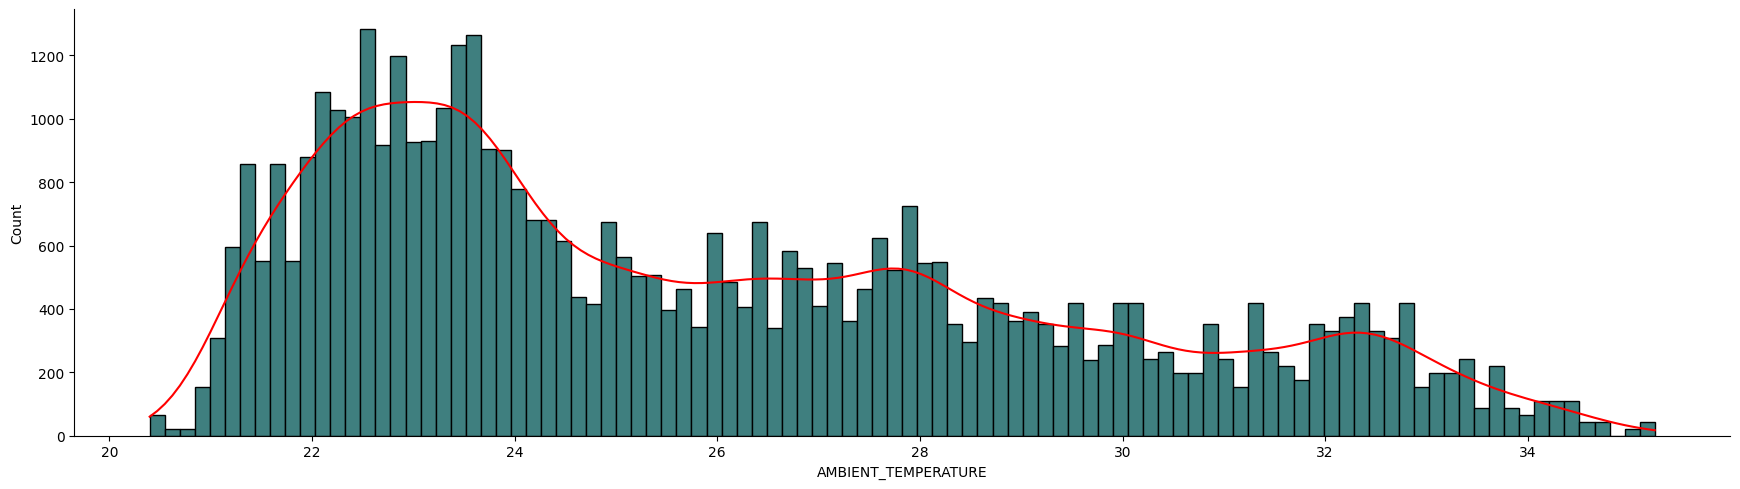

In [41]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5)

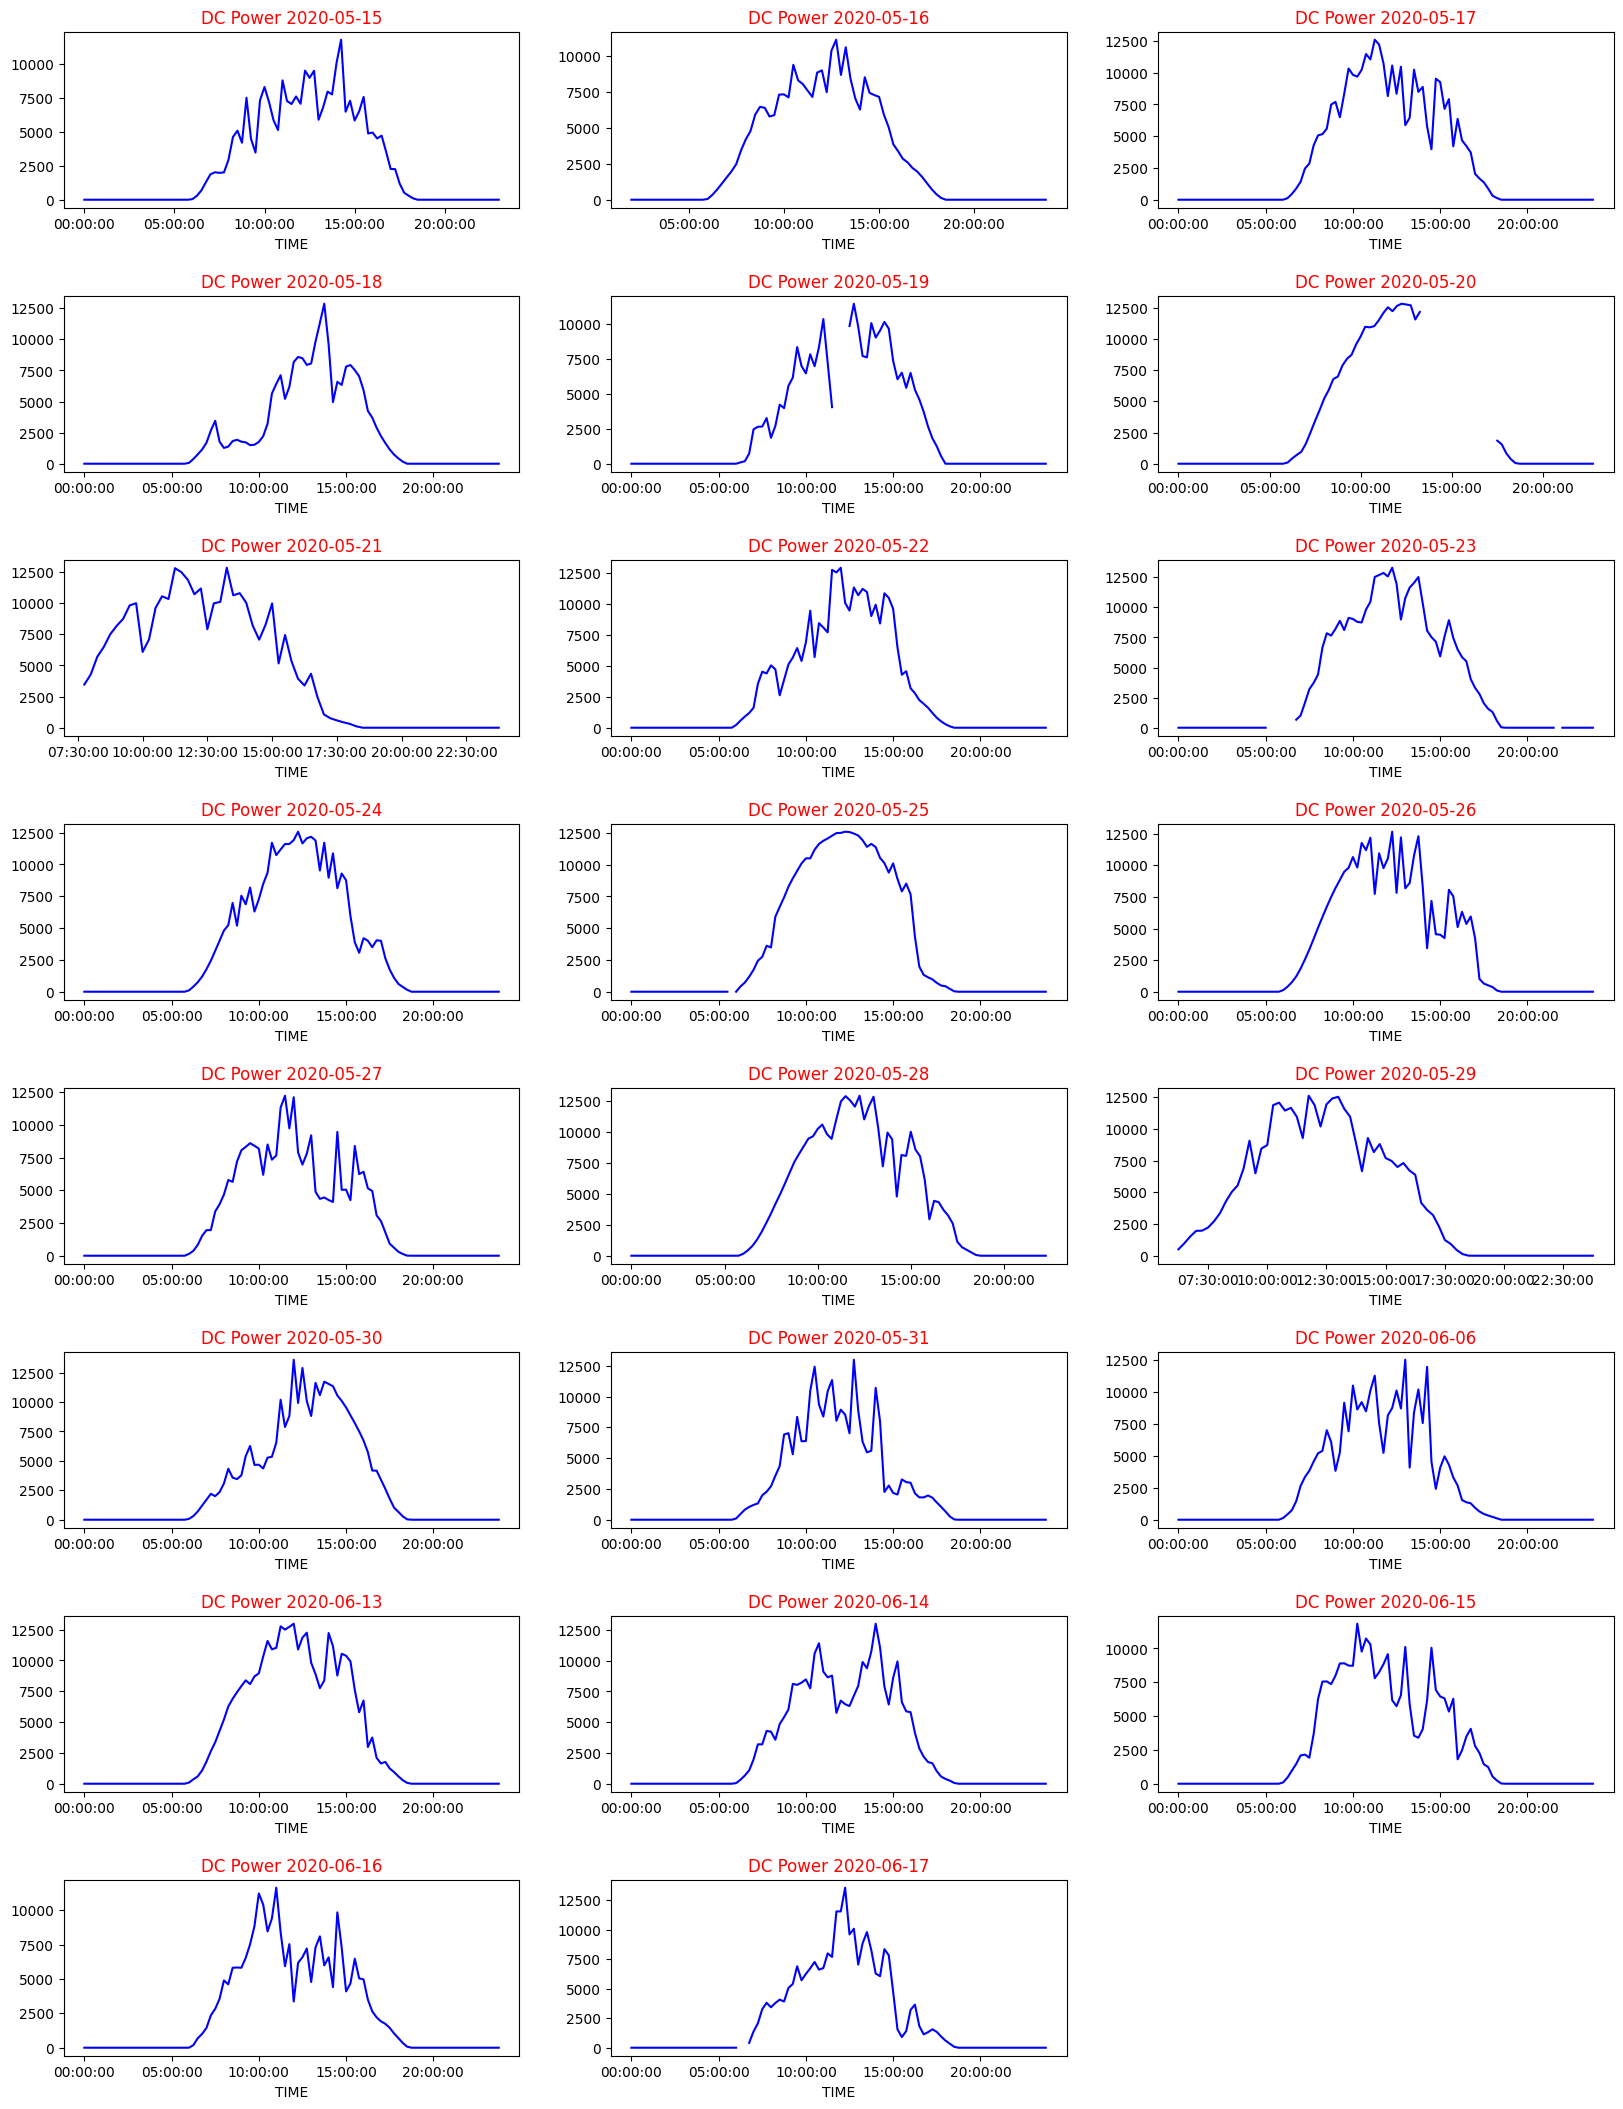

In [42]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='red')
        
Daywise_plot(data=solar_dc, row=12, col=3)

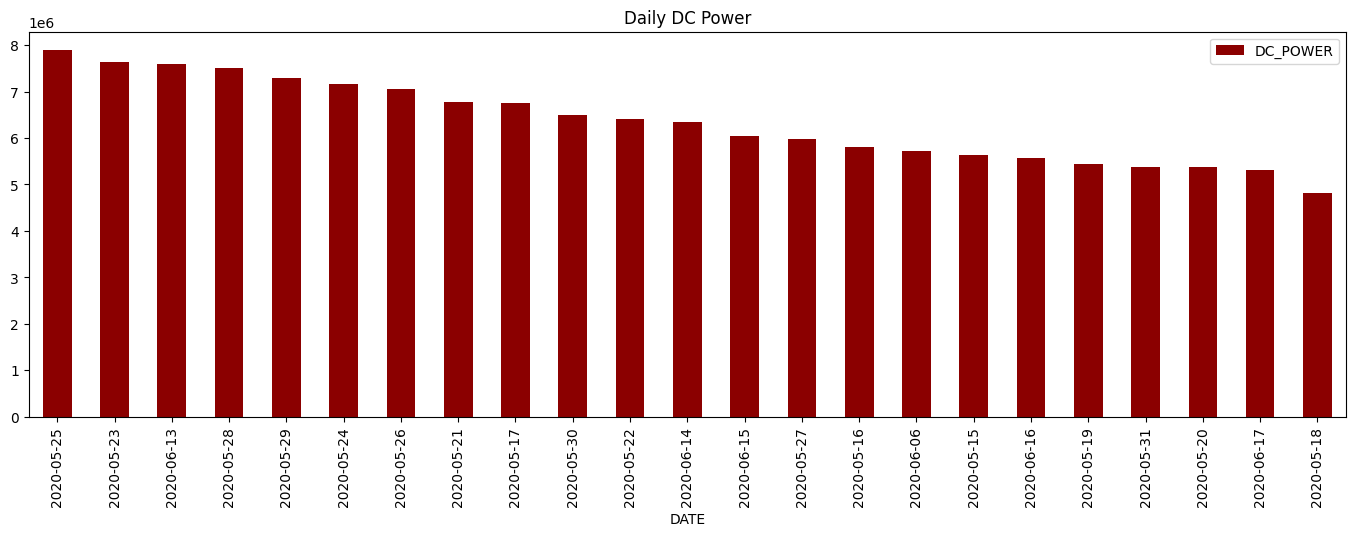

In [43]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkred')
plt.title('Daily DC Power')
plt.show()

Training

In [44]:
from sklearn.model_selection import train_test_split

df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9994%


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print(f'R2 score = {R2_Score_lr:4.4f}%')

R2 score = 100.0000%


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = lr.predict(X_test)

rfrscore = rfr.score(X_test, y_test)* 100
rfr_r2_score = r2_score(y_test, y_pred_rfr)* 100
mse_rfr = mean_squared_error(y_test, y_pred_rfr)* 100

print("Score : ",rfrscore,"%")
print("R2 Score : ",rfr_r2_score,"%")
print("MSE : ",mse_rfr,"%")

Score :  99.99954072898652 %
R2 Score :  99.99942307123939 %
MSE :  92.11669396181621 %


Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = lr.predict(X_test)

dtr_score = dtr.score(X_test, y_test)* 100
dtr_r2_score = r2_score(y_test, y_pred_dtr)* 100
mse_dtr = mean_squared_error(y_test, y_pred_dtr)

R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("Score : ",dtr_score,"%")
print("R2 Score : ",dtr_r2_score,"%")
print("MSE : ",mse_dtr)

Score :  99.99885355495533 %
R2 Score :  99.99942307123939 %
MSE :  0.9211669396181621


Another

In [49]:
import datetime

g1_df = g1_df.groupby('DATE_TIME').agg({
    'DC_POWER': 'mean',
    'AC_POWER': 'mean',
    'DAILY_YIELD': 'mean',
    'TOTAL_YIELD': 'mean',
}).reset_index()

w1_df = w1_df[['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]

def extractFeatures(df, window_day = 3):
    m_df = df.copy()
    for i in range(1, window_day+1):
        m_df[f'DATE_TIME_P{i}D'] = m_df['DATE_TIME'] + datetime.timedelta(days=-i)
        
    m_df['DATE_TIME_N3D'] = m_df['DATE_TIME'] + datetime.timedelta(days=3)
    m_df['DATE_TIME_N7D'] = m_df['DATE_TIME'] + datetime.timedelta(days=7)

    
    for i in range(1, window_day+1):
        m_df = m_df.join(df.set_index('DATE_TIME'), how='inner', on=f'DATE_TIME_P{i}D', rsuffix=f'_P{i}D')
        
    m_df = m_df.join(df.set_index('DATE_TIME')[['TOTAL_YIELD']], how='inner', on='DATE_TIME_N3D', rsuffix='_N3D')
    m_df = m_df.join(df.set_index('DATE_TIME')[['TOTAL_YIELD']], how='inner', on='DATE_TIME_N7D', rsuffix='_N7D')
    
    feature_columns = []
    label_columns = ['TOTAL_YIELD_N3D', 'DATE_TIME_N7D']
    for c in m_df.columns:
        if c.startswith('DATE_TIME'):
            continue
        if c in label_columns:
            continue
        feature_columns.append(c)
        
    X = m_df[feature_columns].values
    y3 = m_df['TOTAL_YIELD_N3D'].values
    y7 = m_df['TOTAL_YIELD_N7D'].values
    return X, y3, y7
m_df = pd.merge(g1_df, w1_df, how='inner', left_on='DATE_TIME', right_on='DATE_TIME')
X, y3, y7 = extractFeatures(m_df)

In [50]:
from sklearn.model_selection import KFold
def KFoldScore(reg, X, y, cv=5):
    kf = KFold(n_splits=cv)
    kf.get_n_splits(X)
    
    accuracies = []
    
    for train_idx, test_idx in kf.split(X):
        X_train = X[train_idx]
        X_test = X[test_idx]
        y_train = y[train_idx]
        y_test = y[test_idx]
        
        reg.fit(X_train, y_train)
        y_pred = np.round(reg.predict(X_test))
        
        acc = np.sqrt(mean_squared_error(y_test, y_pred))
        accuracies.append(acc)
        
    return np.mean(accuracies)

In [51]:
dt_cv_score = KFoldScore(dtr, X, y3, cv=5)
print(f'decision tree score: {dt_cv_score}')

decision tree score: 50667.12880729772
